In [98]:
%matplotlib widget
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, m_e, epsilon_0, k, pi
from pathlib import Path
%reload_ext autoreload

sys.path.append('../')
sys.path.append('../src')
sys.path.append('../utils')


%aimport src.source
%aimport src.plots

from src.source import Simu
from src.plots import plot_max_abs, plot_profiles, SimuData, plot_Dn_over_ellipse
from utils.plotting import set_size

figp = Path('../overleaf/figures')

In [72]:
%autoreload 1
simu = Simu(    'test4',
                B0=1.4,
                R0=1.0,
                a0=0.25,
                harmonic=1,
                theta_in=np.pi/2,
                omega_b=38e9 * 2 * np.pi,
                W0=0.02,
                Power_in=1,
                vmax=4,
                Nv=100,
                Nr=200,
                Ne0=1.0e19,
                Te0=2.0e3 * 1.602e-19,
                mode='O'
                )


In [73]:
print(simu.B0, simu.a0, simu.R0)

1.4 0.25 1.0


In [74]:
def n_crit(omega_b):
    return omega_b**2 * m_e * epsilon_0 / e**2

def f_ce(B0, R0, R):
    return e * B0 / m_e * R0 / R / 2 / np.pi

print(n_crit(simu.omega_b))
f_ce(simu.B0, simu.R0, simu.R0 - simu.a0)/1e9, f_ce(simu.B0, simu.R0, simu.R0 + simu.a0)/1e9

1.7911991232301236e+19


(52.25264776168834, 31.351588657013)

In [75]:
simu.compute()

test exception in O-mode
iR 111
test exception in O-mode
iR 110
test exception in O-mode
iR 109
test exception in O-mode
iR 108
test exception in O-mode
iR 107
test exception in O-mode
iR 106
test exception in O-mode
iR 105
test exception in O-mode
iR 104
test exception in O-mode
iR 103
test exception in O-mode
iR 102
test exception in O-mode
iR 101
test exception in O-mode
iR 100
test exception in O-mode
iR 99


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
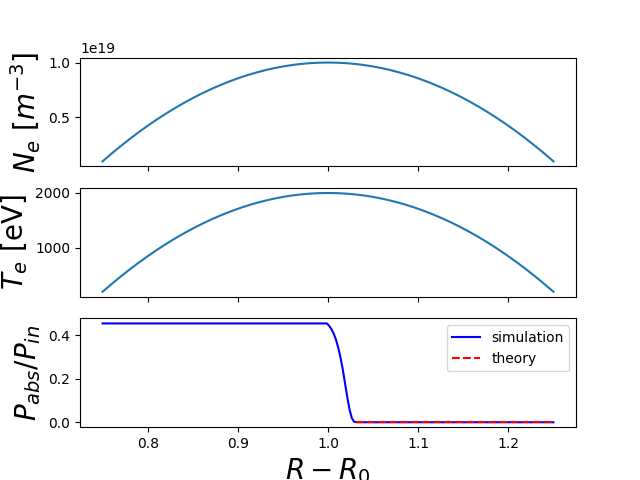

In [76]:
%autoreload 1
plot_profiles('test4')

### Study the impact of the Beam frequency

In [77]:
%aimport src.mpi_job
from src.mpi_job import frequency_scan, density_scan, temp_scan, angle_scan

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
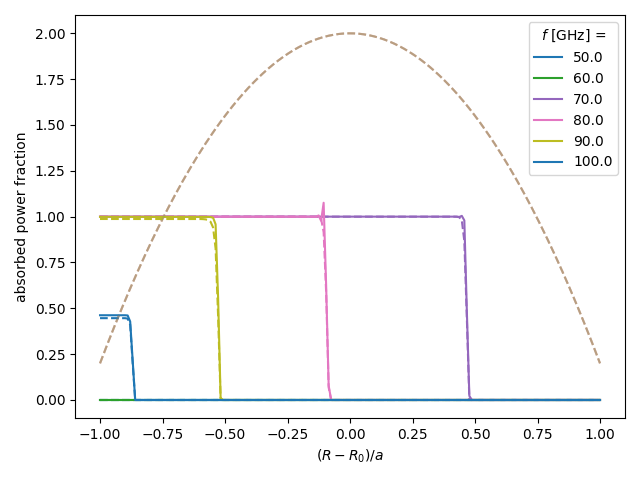

In [78]:
%autoreload 1

# frequency scan
simus = frequency_scan()

fig, ax = plt.subplots()

def R_res_perp():
    pass

for i in range(len(simus)):
    
    simu = Simu.load_pickle(simus[i].name)
    f = simu.omega_b * 1e-9 / 2 / np.pi # frequency in GHz
    f_label = '{:.1f}'.format(f) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar

    R_norm = (vec_R - simu.R0) / simu.a0
    l, = ax.plot(R_norm , (vec_Power[-1] - vec_Power)/vec_Power[-1], '-', label=f_label)
    ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0) / a$")
    ax.set_ylabel("absorbed power fraction")
    #ax.legend(["simulation","theory"])
    ax.legend(title='$f$ [GHz] =')
    
    ax.plot(R_norm, vec_Ne / 1e19, alpha=0.2, ls='--')
    
    #ax.text()
    plt.tight_layout()


### Density scan

['Ne0_0.2e19', 'Ne0_0.5e19', 'Ne0_1.0e19', 'Ne0_2.0e19']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
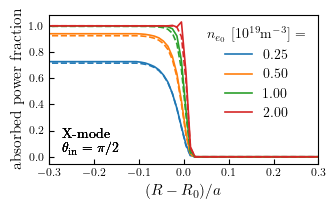

In [116]:
plt.style.use('../utils/tex.mplstyle')
fs = set_size(width='article')

simus = density_scan()

fig, ax = plt.subplots(figsize=fs)

for i in range(len(simus)):
    simu = Simu.load_pickle(simus[i].name)
    n = simus[i].Ne0
    n_label = '{:.2f}'.format(n * 1e-19) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    R_norm = (vec_R - simu.R0) / simu.a0

    l, = ax.plot(R_norm, (vec_Power[-1] - vec_Power)/vec_Power[-1], '-', label=n_label)
    ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0)/a$")
    ax.set_ylabel("absorbed power fraction")
    #ax.legend(["simulation","theory"])
    ax.legend(title='$n_{e_0}$ [$10^{19}\mathrm{m}^{-3}$] =', frameon=False)
    ax.set_xlim(-0.3, 0.3)

    annot = 'X-mode\n'
    annot += r'$\theta_\mathrm{in}=\pi/2$'
    ax.text(0.05, 0.05, annot, ha='left', va='bottom', transform=ax.transAxes)

    #ax.text()
    plt.tight_layout()
#fig.savefig(figp / 'density_scan.pdf')

### Temperature scan

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
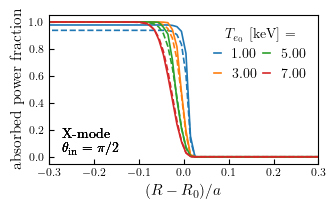

In [115]:
%autoreload 1
simus = temp_scan(perp=True)

fs = set_size(width='article')
fig, ax = plt.subplots(figsize=fs)

for i in range(len(simus)//2):
    
    simu = Simu.load_pickle(simus[2*i].name)
    T = simu.Te0
    T_label = '{:.2f}'.format(T / 1e3 / 1.602e-19) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    R_norm = (vec_R - simu.R0) / simu.a0
    
    l, = ax.plot(R_norm, (vec_Power[-1] - vec_Power)/vec_Power[-1], '-', label=T_label)
    ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0) / a$")
    ax.set_ylabel("absorbed power fraction")
    #ax.legend(["simulation","theory"])
    ax.legend(title='$T_{e_0}$ [keV] =', ncol=2, handlelength=0.5, columnspacing=0.5, frameon=False)
    
    ax.set_xlim(-0.3,0.3)
    
    annot = '{}-mode\n'.format(simu.mode)
    annot += r'$\theta_\mathrm{in}=\pi/2$'
    
    ax.text(0.05, 0.05, annot, ha='left', va='bottom', transform=ax.transAxes)
    #ax.text()
    plt.tight_layout()
#fig.savefig(figp / 'temp_scan_perp.pdf')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
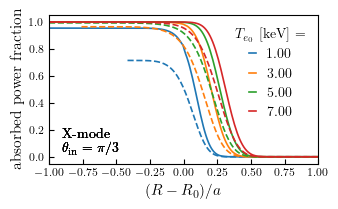

In [117]:
%autoreload 1
simus = temp_scan(perp=False)

fs = set_size(width='article')
fig, ax = plt.subplots(figsize=fs)

for i in range(len(simus)//2):
    
    simu = Simu.load_pickle(simus[2*i].name)
    T = simu.Te0
    T_label = '{:.2f}'.format(T / 1e3 / 1.602e-19) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    R_norm = (vec_R - simu.R0) / simu.a0
    
    l, = ax.plot(R_norm, (vec_Power[-1] - vec_Power)/vec_Power[-1], '-', label=T_label)
    ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0) / a$")
    ax.set_ylabel("absorbed power fraction")
    #ax.legend(["simulation","theory"])
    ax.legend(title='$T_{e_0}$ [keV] =', ncol=1, handlelength=0.5, columnspacing=0.5,
              loc='upper right', frameon=False)
    
    ax.set_xlim(-1.0,1.0)
    
    annot = '{}-mode\n'.format(simu.mode)
    annot += r'$\theta_\mathrm{in}=\pi/3$'
    
    ax.text(0.05, 0.05, annot, ha='left', va='bottom', transform=ax.transAxes)
    #ax.text()
    plt.tight_layout()
#fig.savefig(figp / 'temp_scan_oblique.pdf')

In [ ]:
%autoreload 1
plt.style.use('default')
plot_Dn_over_ellipse('test4')

['theta_1.10', 'theta_1.26', 'theta_1.41', 'theta_1.57', 'theta_1.73', 'theta_1.88', 'theta_2.04']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
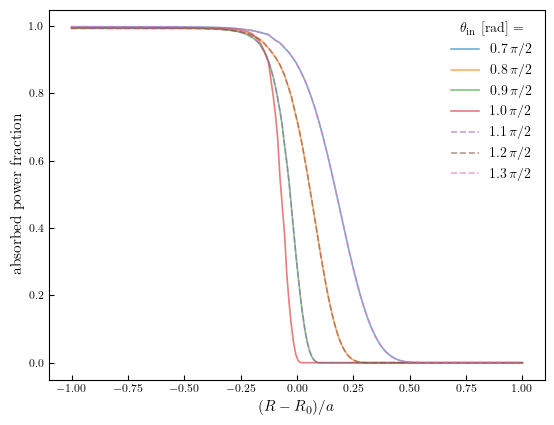

In [129]:
%autoreload 1
simus = angle_scan()

fig, ax = plt.subplots()

for i in range(len(simus)):
    
    simu = Simu.load_pickle(simus[i].name)

    t = simu.theta_in
    t_label = '{:.1f}$\,\pi/2$'.format(t / pi * 2) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    R_norm = (vec_R - simu.R0) / simu.a0
    
    ls = '-' if i <= len(simus)//2 else '--'
    l, = ax.plot(R_norm, (vec_Power[-1] - vec_Power)/vec_Power[-1], ls=ls, label=t_label, alpha=0.6)
    
    #ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0)/a$")
    ax.set_ylabel("absorbed power fraction")
    #ax.legend(["simulation","theory"])
    ax.legend(title=r'$\theta_\mathrm{in}$ [rad] =')
    
    #ax.text()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
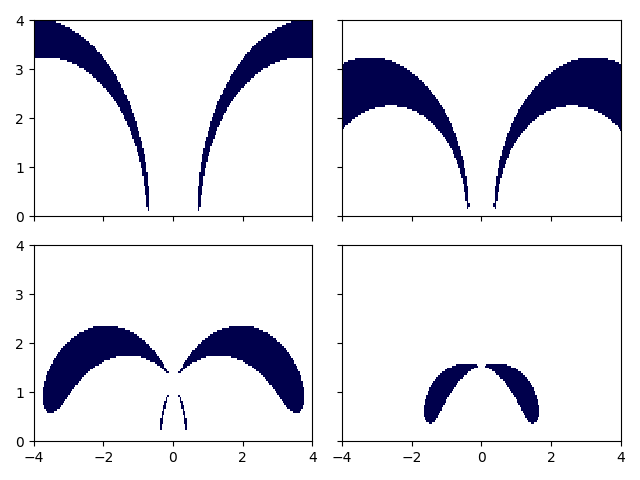

In [65]:
%autoreload 1
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)

k = np.array([0,1,2,3,2,1,0])
for i in range(7):
    simu = simus[i]
    ax = axs.flatten()[k[i]]
    im = plot_max_abs(simu.name, ax, labels=False)
#fig.colorbar(im, ax=ax)
plt.tight_layout()